
# Platform Feedback Analysis

This notebook provides a systematic analysis of platform feedback data, following the tasks outlined in the assessment. 
The steps include:
1. Data preparation and cleaning.
2. Visualization of feedback distribution.
3. Recommendations for feedback form improvement.
4. Analysis of recommendation likelihood.
5. Creation of a PowerPoint presentation summarizing findings and recommendations.


In [13]:
import pandas as pd

# Load the data
file_path = 'platform_rating.csv'
platform_ratings = pd.read_csv(file_path)

# Drop unnecessary rows and columns based on observed structure
cleaned_ratings = platform_ratings.iloc[4:]  # Start from row 4 where data begins

# Renaming columns for clarity
cleaned_ratings = cleaned_ratings.rename(columns={
    'Unnamed: 3': 'Rating'
})

# Retain only the column with ratings and drop all other columns
cleaned_ratings = cleaned_ratings[['Rating']].dropna()

# Convert ratings to numeric values for analysis
cleaned_ratings['Rating'] = pd.to_numeric(cleaned_ratings['Rating'], errors='coerce')

# Remove any rows with invalid or missing numeric ratings
cleaned_ratings = cleaned_ratings.dropna().reset_index(drop=True)

cleaned_ratings.head()


,Rating
0,7
1,7
2,6
3,3
4,4


In [14]:

def categorize_ratings(rating):
    """
    Categorize the ratings into predefined groups.
    """
    if rating in [6, 7]:
        return 'Highly Useful'
    elif rating in [4, 5]:
        return 'Useful'
    elif rating in [1, 2, 3]:
        return 'Maybe Useful'
    else:
        return 'Uncategorized'

# Apply the categorization function to the ratings data
cleaned_ratings['Category'] = cleaned_ratings['Rating'].apply(categorize_ratings)

# Summarize the categorized data for visualization
category_counts = cleaned_ratings['Category'].value_counts()

category_counts


Category
Highly Useful    199
Useful            42
Maybe Useful      17
Name: count, dtype: int64

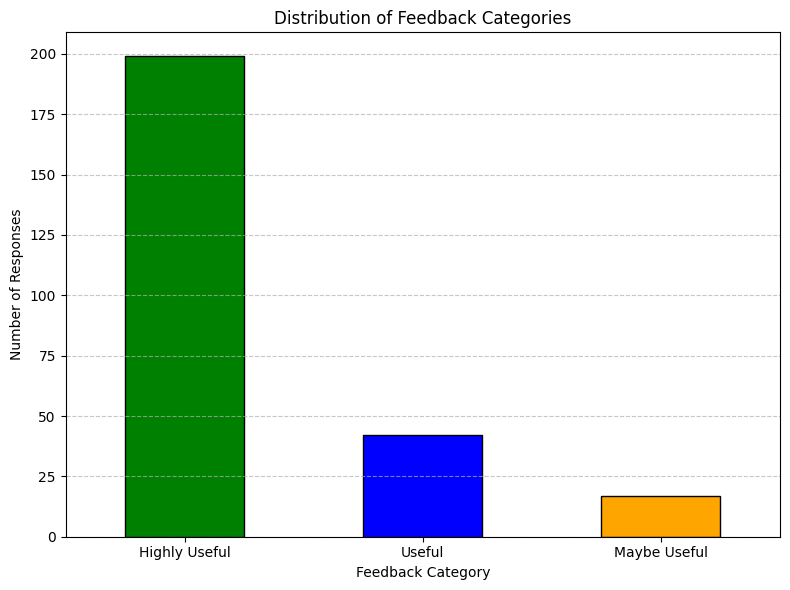

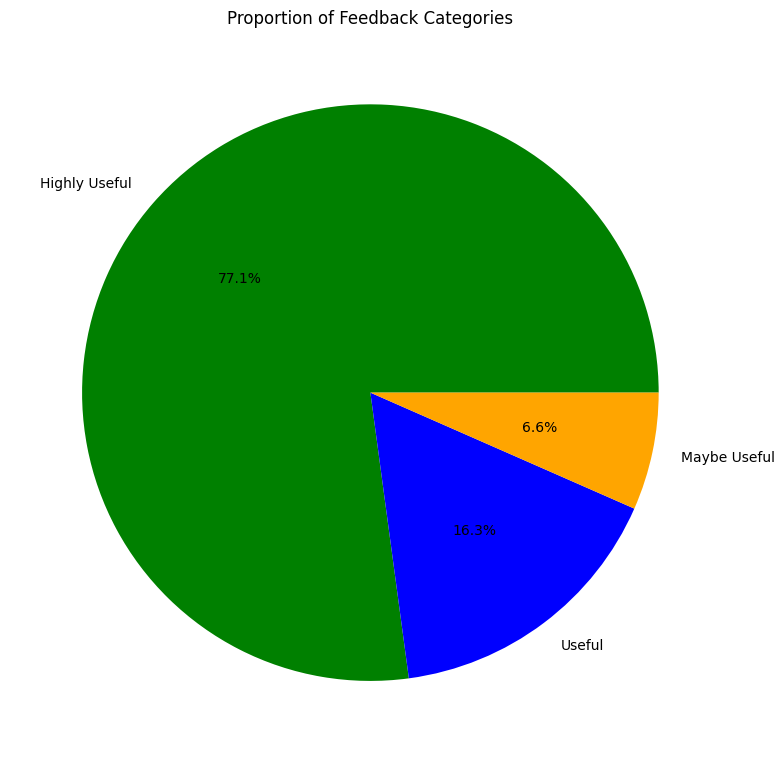

In [15]:

import matplotlib.pyplot as plt

# Bar chart for feedback categories
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color=['green', 'blue', 'orange'], edgecolor='black')
plt.title('Distribution of Feedback Categories')
plt.xlabel('Feedback Category')
plt.ylabel('Number of Responses')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Pie chart for feedback categories
plt.figure(figsize=(8, 8))
category_counts.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'blue', 'orange'])
plt.title('Proportion of Feedback Categories')
plt.ylabel('')  # Remove y-label for clarity
plt.tight_layout()
plt.show()



### Recommendations for Feedback Form Improvement

1. **Add Open-Ended Questions**:
   - Example: "What did you find most useful about the platform?"
   - Benefit: Provides qualitative insights into what features resonate most.

2. **Include a Likert Scale for Specific Features**:
   - Example: "Rate your satisfaction with the following aspects: usability, content quality, and reliability."
   - Benefit: Identifies specific strengths and weaknesses of the platform.

3. **Gauge Emotional Response**:
   - Example: "How did using the platform make you feel? (Excited, Satisfied, Frustrated, etc.)"
   - Benefit: Captures emotional engagement, critical for adoption.

4. **Ask for Suggestions**:
   - Example: "What improvements would you like to see in the platform?"
   - Benefit: Direct input on potential enhancements.

5. **Add a Net Promoter Score (NPS) Question**:
   - Example: "How likely are you to recommend this platform to your peers? (1-10 scale)"
   - Benefit: Quantifies overall sentiment and potential advocacy.


In [16]:

def calculate_recommendation_likelihood(data, threshold=6):
    """
    Estimate the likelihood of recommendations based on ratings.
    Assumes ratings >= threshold indicate likelihood to recommend.
    """
    total_responses = len(data)
    recommend_count = data[data['Rating'] >= threshold].shape[0]
    
    likelihood_percentage = (recommend_count / total_responses) * 100
    return likelihood_percentage

# Calculate the likelihood of recommending the platform
recommendation_likelihood = calculate_recommendation_likelihood(cleaned_ratings)
recommendation_likelihood


77.13178294573643